## 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [37]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4


- 아버지와 아들의 키만 발췌

In [27]:
# Filtering - 아들의 키
df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [29]:
# Selection - 아버지와 아들 데이터만 선택
df =df[['Father', 'Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [38]:
# 한 줄로 줄이면
df = df[df.Gender == 'M'][['Father','Height']]
df.rename(columns = {'Height':'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [39]:
# inch를 cm로
df = df*2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

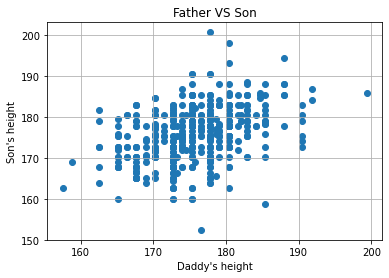

In [44]:
# x: 아버지, y: 아들
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Daddy's height")
plt.ylabel("Son's height")
plt.title("Father VS Son")
plt.show()

- 회귀선 구하기

In [53]:
weight, bias = np.polyfit(df.Father, df.Son, 1) # 선형회귀니까 1차식
# polyfit : 주어진 데이터에 대해 최소 제곱을 갖는 다항식을 반환함
weight, bias

(0.4477479176030241, 97.1776370073936)

In [46]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

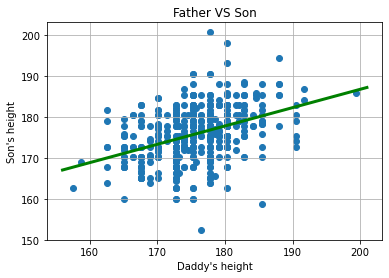

In [52]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'green', lw=3)
plt.grid()
plt.xlabel("Daddy's height")
plt.ylabel("Son's height")
plt.title("Father VS Son")
plt.show()

- scikit-learn으로 회귀식 구하기

In [54]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [55]:
lr.fit(df.Father.values.reshape(-1,1),df.Son.values)

LinearRegression()

In [56]:
# 기울기, weight
lr.coef_

array([0.44774792])

In [59]:
# 절편, bias
lr.intercept_

97.1776370073936

In [60]:
weight, bias

(0.4477479176030241, 97.1776370073936)

In [61]:
# 잔차 제곱의 합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [62]:
# R squared - 성능 평가 요소
lr.score(df.Father.values.reshape(-1,1),df.Son.values)

0.15312927478307026